# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Numeric Variable**

In [ ]:
airbnburl = 'https://raw.githubusercontent.com/aileenkent/wrangling/refs/heads/main/assignment/data/airbnb_hw.csv'
airbnb = pd.read_csv(airbnburl)

In [ ]:
airbnb.head() #to figure out what the data looks like

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
airbnb['Price'].describe() #understanding what might be some issues with the data

,Price
count,30478
unique,511
top,150
freq,1481


In [ ]:
airbnb['Price'].isnull().sum() #checking for any missing, null, or nan values that are not coded as 0

0

In [ ]:
airbnb['Price'] = airbnb['Price'].str.replace(',', '')
airbnb['Price'] = airbnb['Price'].str.replace('$', '')
airbnb['Price'] = airbnb['Price'].str.replace(' ', '') # removing common symbols in number based data that prevents the transistion to integers
airbnb['Price'] = airbnb['Price'].astype(int) # converting from object type class so can run math things on it

In [ ]:
airbnb['Price'].describe()

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


**Categorical Variable**

In [ ]:
MN_police_url = 'https://raw.githubusercontent.com/aileenkent/wrangling/refs/heads/main/assignment/data/mn_police_use_of_force.csv'
MN_police_data = pd.read_csv(MN_police_url)

In [ ]:
MN_police_data['subject_injury'].isnull().sum()

9848

In [ ]:
MN_police_data['subject_injury'].value_counts()

,count
subject_injury,
Yes,1631
No,1446


In [ ]:
proportion_missing = MN_police_data['subject_injury'].isnull().sum() / len(MN_police_data['subject_injury'])
proportion_missing #figuring out how big of a problem the missing values are going to be

0.7619342359767892

In [ ]:
MN_police_data['subject_injury'] = MN_police_data['subject_injury'].fillna('Not recorded') #creating a new option because simply putting no for 76% of the data seems like might cause some overlooking

In [ ]:
MN_police_data['subject_injury'].isnull().sum() #making sure the replacement work

0

In [ ]:
MN_police_data['force_type'].isnull().sum()

0

In [ ]:
print(MN_police_data['force_type'].unique())

['Bodily Force' 'Chemical Irritant' 'Taser' 'Improvised Weapon'
 'Gun Point Display' 'Police K9 Bite' 'Baton' 'Firearm'
 'Less Lethal Projectile' 'Maximal Restraint Technique' 'Less Lethal']


In [ ]:
crossing = pd.crosstab(MN_police_data['subject_injury'], MN_police_data['force_type'])
crossing

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Not recorded,2,7051,1421,0,27,74,87,0,170,31,985
Yes,2,1286,41,0,44,40,0,2,0,44,172


The missing data appears to have a high percentage of the bodily force and chemical irritant force types. It is possible that the missing subject injury cases with those force types resulted in an injury, but just not one that necessarily needed to be reported. What is likely is that a fair amount of the missing subject injuries are injuries that the subjects wouldn't report so the police didn't feel the need to.

**Dummy Variable**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving justice_data.parquet to justice_data.parquet


In [ ]:
justice_data = pd.read_parquet('justice_data.parquet')
justice_data.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [ ]:
justice_data['WhetherDefendantWasReleasedPretrial'].isnull().sum()

0

In [ ]:
justice_data['WhetherDefendantWasReleasedPretrial'].unique()

array([9, 0, 1])

In [ ]:
justice_data['WhetherDefendantWasReleasedPretrial'].describe()

,WhetherDefendantWasReleasedPretrial
count,22986.000000
mean,0.845428
std,0.477276
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


In [ ]:
print(justice_data['WhetherDefendantWasReleasedPretrial'].value_counts())

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64


In [ ]:
cross_pretrial = pd.crosstab((justice_data['WhetherDefendantWasReleasedPretrial']==9), justice_data['PretrialReleaseDate'])
cross_pretrial

PretrialReleaseDate,,1/10/2018,1/11/2018,1/12/2018,1/16/2018,1/17/2018,1/18/2018,1/19/2018,1/20/2018,1/22/2018,...,6/28/2018,7/25/2018,7/26/2018,7/3/2018,7/31/2018,8/23/2018,8/26/2018,8/27/2018,8/29/2018,8/9/2018
WhetherDefendantWasReleasedPretrial,,,,,,,,,,,,,,,,,,,,,
False,3952,7,4,1,3,3,3,6,1,8,...,1,2,1,1,1,1,1,2,1,1
True,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cross_bond = pd.crosstab(justice_data['WhetherDefendantWasReleasedPretrial'], justice_data['BondTypeAtInitialContact'])
cross_bond

BondTypeAtInitialContact,1,2,3,4,5,6,7,9
WhetherDefendantWasReleasedPretrial,,,,,,,,
0,3368,360,7,2,21,0,39,4
1,2575,3776,5411,1802,233,5285,72,0
9,10,13,1,1,0,0,6,0


In [ ]:
#we are going to replace some of the 9s (as unknown if released pretrial) based on if they were given a bond pretrial or denyed one
justice_data.loc[justice_data['BondTypeAtInitialContact'] == 1, 'WhetherDefendantWasReleasedPretrial'] = 0
#this essentially means that if the person wasn't given a bond at initial contact we are assuming that they were not released, which is an assumption but a valid one (in my opinion)

In [ ]:
print(justice_data['WhetherDefendantWasReleasedPretrial'].value_counts())

WhetherDefendantWasReleasedPretrial
1    16579
0     6386
9       21
Name: count, dtype: int64


In [ ]:
#we are making the other 9s NaNs so that it is clear they are missing values
justice_data['WhetherDefendantWasReleasedPretrial'] = justice_data['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
print(justice_data['WhetherDefendantWasReleasedPretrial'].value_counts())

WhetherDefendantWasReleasedPretrial
1.0    16579
0.0     6386
Name: count, dtype: int64


**Missing Values, not at Random**

In [ ]:
justice_data['ImposedSentenceAllChargeInContactEvent'].value_counts()

,count
ImposedSentenceAllChargeInContactEvent,
,9053
0,4953
12,1404
.985626283367556,1051
6,809
...,...
49.9712525667351,1
57.0349075975359,1
79.9260780287474,1


In [ ]:
justice_data['ImposedSentenceAllChargeInContactEvent'].isnull().sum()

0

In [ ]:
len(justice_data['ImposedSentenceAllChargeInContactEvent'])

22986

In [ ]:
len(justice_data['SentenceTypeAllChargesAtConvictionInContactEvent'])

22986

In [ ]:
justice_data['SentenceTypeAllChargesAtConvictionInContactEvent'].isnull().sum()

0

In [ ]:
justice_data['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts()

,count
SentenceTypeAllChargesAtConvictionInContactEvent,
4,8779
0,8720
1,4299
2,914
9,274


In [ ]:
justice_data['ImposedSentenceAllChargeInContactEvent'].describe()

,ImposedSentenceAllChargeInContactEvent
count,22986
unique,484
top,
freq,9053


In [ ]:
#going to start changing the ImposedSentence Values based on the SentenceType Values
#i can do this semi-confidently bc the two categories have the same length and no null values
justice_data.loc[justice_data['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0, 'ImposedSentenceAllChargeInContactEvent'] = 0
#a sentence type value of 0 means no incarceration
justice_data.loc[justice_data['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, 'ImposedSentenceAllChargeInContactEvent'] = np.nan
# a sentence type value of 9 means that the incarceration length was no applicable so it does not exist/is unknown (hence nan and not 0)
justice_data.loc[justice_data['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 'ImposedSentenceAllChargeInContactEvent'] = 0
# a sentence type value of 4 means that the case has not yet been decided or was dismissed so imposed sentence has to be 0

In [ ]:
cross_sentence = pd.crosstab(justice_data['SentenceTypeAllChargesAtConvictionInContactEvent'], justice_data['ImposedSentenceAllChargeInContactEvent'])
cross_sentence

ImposedSentenceAllChargeInContactEvent,0.000000,0.032854,0.065708,0.098563,0.131417,0.164271,0.197125,0.262834,0.328542,0.394251,...,840.000000,960.000000,1011.000000,1029.000000,1080.000000,1200.000000,1500.000000,1752.000000,1980.000000,2208.000000
SentenceTypeAllChargesAtConvictionInContactEvent,,,,,,,,,,,,,,,,,,,,,
0,8720,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,6,21,6,10,33,6,3,337,3,...,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,1
4,8779,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#have to make it numeric first
#justice_data['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(justice_data['ImposedSentenceAllChargeInContactEvent'], errors='coerce')
#this did not give me what i wanted
#justice_data[(justice_data['ImposedSentenceAllChargeInContactEvent'] > 12) & (justice_data['SentenceTypeAllChargesAtConvictionInContactEvent'] == 1)].value_counts()

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving GSAF5.xls to GSAF5.xls


In [ ]:
shark_data = pd.read_excel('GSAF5.xls')
shark_data.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
shark_data = shark_data.drop(columns=['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'])
#dropping the columns that have no data
shark_data.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...


In [ ]:
shark_data['Year'].value_counts()

,count
Year,
2015.0,143
2017.0,140
2016.0,131
0.0,129
2011.0,128
...,...
1785.0,1
1784.0,1
1783.0,1


In [ ]:
shark_data = shark_data[shark_data['Year'] >= 1940.0]

In [ ]:
shark_data['Year'].value_counts()

,count
Year,
2015.0,143
2017.0,140
2016.0,131
2011.0,128
2014.0,126
...,...
1979.0,25
1940.0,24
1945.0,16


The attacks appear to be increasing over time.

In [ ]:
shark_data['Age'].value_counts()

,count
Age,
16,80
19,80
17,78
15,76
18,74
...,...
46 & 34,1
12 or 13,1
18 or 20,1


In [ ]:
shark_data['Age'].unique()

array([12, 37, 23, 40, 28, 69, 48, '60+', '?', 57, 24, 45, 61, 27, 38, 16,
       33, 30, 15, 41, 14, 26, 'Middle age', 18, 21, 49, 25, 46, 19, 20,
       65, 64, '13', nan, '11', '46', '32', '29', '10', '64', '62', '39',
       '22', '15', '16', '21', '66', '52', '20', '44', '26', '47', '55',
       '30', '59', '8', '50', '45', '34', '38', '30s', '37', '9', '19',
       '20/30', '35', '65', '20s', '77', '60', '49', '42', '!2', '24',
       '73', '25', '18', '50s', '58', '67', '17', '14', '6', '41', '53',
       '68', '43', '40', '51', '31', 39, 58, 51, 17, 10, 13, 60, '40s',
       68, 35, 62, 'teen', 8, 22, 32, 56, 'Teen', 42, 36, 50, 'M', 9, 11,
       34, '!6', 31, '!!', 47, 55, 7, 71, 59, 53, 54, 75, '45 and 15', 73,
       52, 29, 70, 4, 63, 44, '28 & 22', '22, 57, 31', '60s', "20's", 43,
       67, 74, '9 & 60', 'a minor', 6, 3, 82, 66, 72, '23', '12', '36',
       '63', '71', '48', '70', '18 months', '57', '7', '28', '33', '61',
       '74', '27', '3', '56', '28 & 26', '5', '54

In [ ]:
#we are getting ride of the none numbers
def cleaning(value):
  value = str(value) # made it a string so could use the isdigit to filter out the random stuff
  if value.isdigit():
    return int(value)
  else:
    return np.nan

(array([124., 929., 897., 630., 376., 309., 181.,  72.,  30.,   5.]),
 array([ 1. ,  9.6, 18.2, 26.8, 35.4, 44. , 52.6, 61.2, 69.8, 78.4, 87. ]),
 <BarContainer object of 10 artists>)

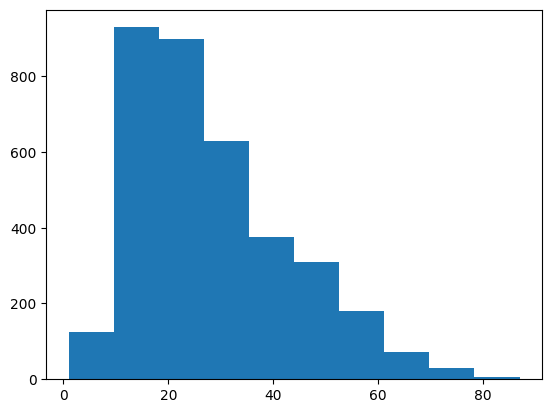

In [ ]:
shark_data['Age'] = shark_data['Age'].apply(cleaning)
plt.hist(shark_data['Age'])

In [ ]:
shark_data['Sex'].value_counts()

,count
Sex,
M,4295
F,706
M,2
M,1
lli,1
M x 2,1


In [ ]:
shark_data['Sex'].unique()

array(['M', 'F', nan, ' M', 'M ', 'lli', 'M x 2'], dtype=object)

In [ ]:
shark_data['Sex'] = shark_data['Sex'].replace(['M ', ' M', 'M x 2'], 'M')
shark_data['Sex'].value_counts()

,count
Sex,
M,4299
F,706
lli,1


In [ ]:
4299 / len(shark_data['Sex']) # this is the proportion of the victims that are male

0.787651154268963

In [ ]:
shark_data['Type'].unique()

array(['Unprovoked', 'Provoked', ' Provoked', 'Questionable',
       'Watercraft', 'Sea Disaster', nan, '?', 'Unconfirmed',
       'Unverified', 'Invalid', 'Under investigation', 'Boat'],
      dtype=object)

In [ ]:
shark_data['Type'] = shark_data['Type'].replace(['Questionable', 'Watercraft', 'Sea Disaster', 'nan', '?', 'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation', 'Boat'], 'Unknown')
shark_data['Type'] = shark_data['Type'].replace(['Provoked ', ' Provoked'], 'Provoked')
shark_data['Type'].value_counts()

,count
Type,
Unprovoked,4055
Unknown,871
Provoked,518


In [ ]:
4055 / len(shark_data['Type']) # this is the proportion of the attacks that are unprovoked

0.7429461341150605

In [ ]:
shark_data['Fatal Y/N'].unique()

array(['N', 'Y', 'F', 'M', nan, 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N'],
      dtype=object)

In [ ]:
shark_data['Fatal Y/N'] = shark_data['Fatal Y/N'].replace(['N ', ' N', 'n'], 'N')
shark_data['Fatal Y/N'] = shark_data['Fatal Y/N'].replace(['Y x 2', 'F'], 'Y')
shark_data['Fatal Y/N'] = shark_data['Fatal Y/N'].replace(['UNKNOWN', 2017, 'M', 'Nq'], 'Unknown')
shark_data['Fatal Y/N'].value_counts()

,count
Fatal Y/N,
N,4186
Y,816
Unknown,50


In [ ]:
pd.crosstab(shark_data['Sex'], shark_data['Type'] == 'Unprovoked')

Type,False,True
Sex,,
F,106,600
M,986,3313
lli,0,1


In [ ]:
pd.crosstab(shark_data['Fatal Y/N'], shark_data['Type'])

Type,Provoked,Unknown,Unprovoked
Fatal Y/N,,,
N,496,357,3324
Unknown,5,6,38
Y,13,122,681


In [ ]:
pd.crosstab(shark_data['Sex'], shark_data['Fatal Y/N'])

Fatal Y/N,N,Unknown,Y
Sex,,,
F,560,3,87
M,3328,26,653
lli,1,0,0


Sharks are more likely to launch unprovoked attacks on men.
The attack is more likely to be Fatal when it is provoked.
The attack is more likely to be Fatal when it is a woman.
Personally, I'm not like afraid of sharks but I'm not jumping to go swimming with them.

In [ ]:
shark_data['Species '].unique()

array(['Not stated', 'Bronze whaler', 'Reportedly Tiger or Bull shark',
       ..., 'White shark, species identity confirmed by tooth pattern',
       'White shark, 160-kg [353-lb], identity confirmed by tooth pattern',
       ' White shark'], dtype=object)

In [ ]:
shark_data['Species'] = shark_data['Species '].str.split()
white_shark = shark_data['Species'].apply(lambda x: 'White')

In [ ]:
len(white_shark)/len(shark_data['Species'])

1.0

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper is about how to clean data effectively and make the data 'tidy'.
2. The "tidy data standard" intended to ease the process of data cleaning and facilitate initial analysis.
3. The "Like families.." sentence means that every messy data set has unique challenges and difficulties. The "For a given..." sentence means that observations and variables are such fluid, broad terms that there is no real general defintion as it must always be in the context of the dataset.
4. Wickham defines values as the collection of things that make a dataset. He defines variables as all values that measure the same attribue and observations all values measured on the same unite across attributes (basically columns and rows respectively).
5. Tidy data is defined as having each variable in a column, each observation in a rose, and each type of observational unit forming a table.
6. The five most common problems with messy datasets are have column headers as values not variable names, multiple variables being stored in one column, variables being stored in both rows and columns, multiple types of observational unites stored in the same table, and a single observational unit being stored in multiple tables at the same time. The data in Table 4 is messy because the variables are being stored in rows not in the columns. "Melting" a datset is a method of stacking the dataset where columns are typically turned into rows and vice versa.
7. Table 11 is messay but Table 12 is not because there are a ton of extra observational units in Table 11 that are unnecessary and add nothing to the dataset.
8. The "chicken-and-egg" problem with focusing on tidy data is that tidy tools will always be linked to tidy data if tidy data is only as useful as the tools to wokr with it. Wickman hopes that in the future with further work on the subject of data wrangling, other frameworks and strategies will be developed to make cleaning data easier.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?